# 텍스트 분석과 시각화

- 빈도를 바탕으로 한 그래프와 워드 클라우드(word cloud)
- 텍스트 분석은 문서를 구성하는 단어 파악이 핵심
- 예. 대통령 연설문에 사용된 단어들의 빈도 분석 -> 대통령이 중요시하는 것이 무엇인지 의도파악
  - https://cyram.tistory.com/309

## 1. 단어 빈도 그래프 : 가장 많이 쓰인 단어는?

- 토큰화, 어간 추출, 불용어 제거 등 텍스트 데이터 전처리 후 진행

#### 예제 데이터. 
- 영어소설 : 루이스캐럴의 '이상한 나라의 앨리스'
- 구텐베르크 프로젝트 : 저작권 만료 소설 ebook 제공
    - https://www.gutenberg.org

### 1) 데이터 로딩과 텍스트 전처리

In [1]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

- 문서 다운로드 및 내용 확인

In [2]:
doc_alice = gutenberg.open( 'carroll-alice.txt').read()
print(f'doc type: {type(doc_alice)}')
print(f'Number if characters: {len(doc_alice)}')

doc type: <class 'str'>
Number if characters: 144395


In [3]:
print(doc_alice[:1000])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

- 토큰화

In [4]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(doc_alice)
print(f'Number of tokens: {len(tokens)}')
print(f'Token Sample: {tokens[:20]}')

Number of tokens: 33535
Token Sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


- 어간 추출

In [5]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem_tokens = [stemmer.stem(token) for token in tokens]
print(f'Number of token after stemming: {len(stem_tokens)}')
print(f'Token sample after stemming: {stem_tokens[:20]}')

Number of token after stemming: 33535
Token sample after stemming: ['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


- 표제어 추출

In [6]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
lemma_tokens = [lemma.lemmatize(token) for token in tokens]
print(f'Number of token after lemmatization: {len(lemma_tokens)}')
print(f'Token sample after lemmatization: {lemma_tokens[:20]}')

Number of token after lemmatization: 33535
Token sample after lemmatization: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


- 정규표현식을 이용한 토큰화

In [7]:
from nltk.tokenize import RegexpTokenizer

reg = RegexpTokenizer(r'[\w]{3,}')
reg_tokens = reg.tokenize(doc_alice.lower())
print(f'Number of token after RegexpTokenizer: {len(reg_tokens)}')
print(f'Token sample after RegexpTokenizer: {reg_tokens[:20]}')

Number of token after RegexpTokenizer: 21221
Token sample after RegexpTokenizer: ['alice', 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


- 불용어 제거

In [8]:
from nltk.corpus import stopwords

stopw = set(stopwords.words('english'))
len(stopw)

198

In [19]:
# result = []
# for token in reg_tokens:
#     if token not in stopw:
#         result.append(token)

In [9]:
result = [token for token in reg_tokens if token not in stopw]
print(f'Number of token after stopwords elimination: {len(result)}')
print(f'Token sample after stopwords elimination: {result[:20]}')

Number of token after stopwords elimination: 12105
Token sample after stopwords elimination: ['alice', 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


- 단어별 빈도

In [10]:
from collections import Counter
alice_word_counter = Counter(result)
print(f'Number of token: {len(result)}')
print(f'Number of word: {len(alice_word_counter)}')
print(f'Top 20 high frequency words:\n{alice_word_counter.most_common(20)}')

Number of token: 12105
Number of word: 2405
Top 20 high frequency words:
[('said', 462), ('alice', 398), ('little', 128), ('one', 104), ('know', 88), ('like', 85), ('would', 83), ('went', 83), ('could', 77), ('queen', 75), ('thought', 74), ('time', 71), ('see', 67), ('well', 63), ('king', 63), ('turtle', 59), ('began', 58), ('way', 56), ('hatter', 56), ('mock', 56)]


- 품사 태깅하여 명사, 동사, 형용사만 추출

In [11]:
from nltk import pos_tag

tag_set = ['NN', 'VB', 'VBD', 'JJ']
result2 = [word for word, tag in pos_tag(result) if tag in tag_set]
alice_word_counter2 = Counter(result2)
print(f'Number of word: {len(alice_word_counter2)}')
print(f'Top 20 high frequency words:\n{alice_word_counter2.most_common(20)}')

Number of word: 1601
Top 20 high frequency words:
[('said', 462), ('alice', 301), ('little', 125), ('went', 83), ('queen', 73), ('time', 71), ('began', 58), ('turtle', 58), ('way', 56), ('thought', 54), ('mock', 54), ('thing', 49), ('voice', 48), ('rabbit', 47), ('head', 47), ('gryphon', 46), ('see', 44), ('looked', 43), ('got', 43), ('hatter', 42)]


### 2) 시각화 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

#### 전체 단어별 빈도수 시각화

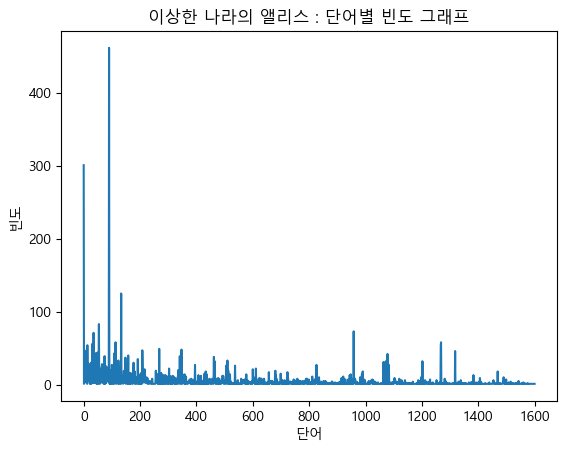

In [14]:
word_freq_list = [alice_word_counter2[key] for key in alice_word_counter2]

plt.plot(word_freq_list)
plt.title('이상한 나라의 앨리스 : 단어별 빈도 그래프')
plt.xlabel('단어')
plt.ylabel('빈도')
plt.show()

지프의 법칙(Zipf's law)
- 하버드대학교 언어학자 조지 킹슬리 지프가 제안
- 말뭉치의 단어들을 사용빈도가 높은 순서대로 나열하면 단어의 사용빈도는 순위에 반비례한다

#### 빈도수 막대그래프
- 사용 빈도가 높은 상위 20개 단어

In [15]:
import pandas as pd

cnt_series = pd.Series(alice_word_counter2)
cnt_series

alice         301
carroll         1
chapter        11
rabbit         47
hole            5
             ... 
loving          1
childhood       1
gather          1
wonderland      1
happy           1
Length: 1601, dtype: int64

In [18]:
cnt_df = pd.DataFrame(cnt_series, columns=['Freq'])
cnt_df.index.name = 'word'
cnt_df

,Freq
word,
alice,301
carroll,1
chapter,11
rabbit,47
hole,5
...,...
loving,1
childhood,1
gather,1


In [19]:
cnt_df_sort = cnt_df.sort_values(by='Freq', ascending=False)
cnt_df_sort.head()

,Freq
word,
said,462
alice,301
little,125
went,83
queen,73


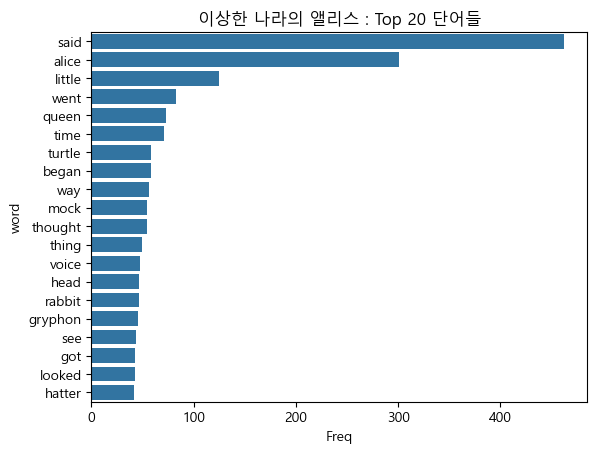

In [20]:
df20 = cnt_df_sort.iloc[:20]
sns.barplot(data=df20, x='Freq', y=df20.index)
plt.title('이상한 나라의 앨리스 : Top 20 단어들')
plt.show()

#### 워드 클라우드(word cloud)

- 텍스트 분석 결과를 보여주는 시각화 도구
- 빈도가 높은 단어는 크게, 낮은 단어는 작게 표시
- 단어 빈도 분포를 한 눈에 파악할 수 있음

워드 클라우드 설치

In [40]:
#pip install wordcloud

In [21]:
import wordcloud
wordcloud.__version__

'1.9.4'

워드 클라우드 이미지 생성 후 plt.imshow()를 이용하여 이미지 출력

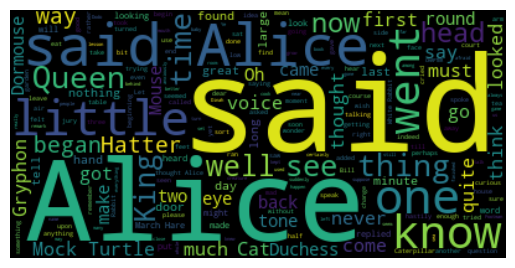

In [22]:
from wordcloud import WordCloud

wc = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [25]:
wc.to_array().shape

(200, 400, 3)

wordcloud 폰트 크기 조절 : max_font_size
- 빈도수가 높은 단어와 낮은 단어의 폰트 크기 차이 조절
- 폰트 최대 크기 제한

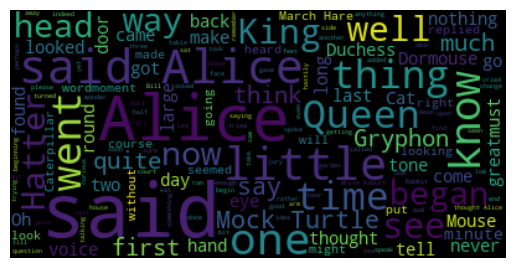

In [26]:
wc2 = WordCloud(max_font_size=60).generate(doc_alice)
plt.axis('off')
plt.imshow(wc2, interpolation = 'bilinear')
plt.show()

토큰화, 불용어 제거, 품사 태깅 등의 작업 결과 활용한 워드클라우드
- generate_from_frequencies() 메서드

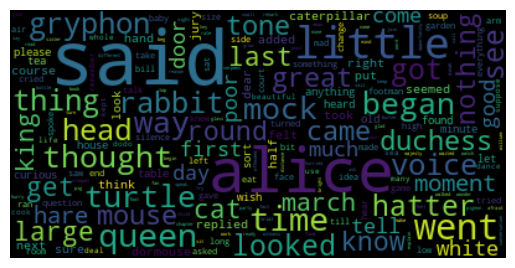

In [28]:
wc3 = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_counter2)
plt.axis('off')
plt.imshow(wc3, interpolation = 'bilinear')
plt.show()

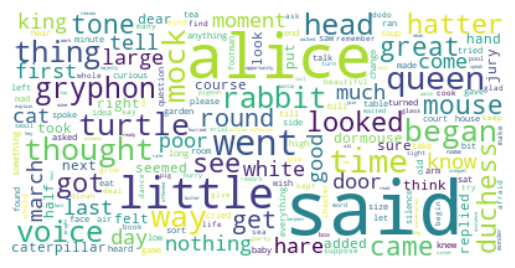

In [29]:
wc4 = WordCloud(max_font_size=60,
                background_color='white',
               ).generate_from_frequencies(alice_word_counter2)
plt.axis('off')
plt.imshow(wc4, interpolation = 'bilinear')
plt.show()

In [30]:
wc4.to_file('img/alice_wordcloud01.jpg')

이미지 위에 워드 클라우드 출력
- mask 매개변수 사용

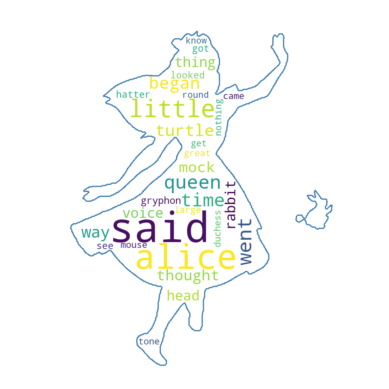

In [35]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open('img/alice_mask.png'))
wc5 = WordCloud(background_color='white',
                max_words=30,
                mask=alice_mask,
                contour_width=3,
                contour_color='steelblue')
wc5.generate_from_frequencies(alice_word_counter2)
wc5.to_file('img/alice_wordcloud02.jpg')
plt.axis('off')
plt.imshow(wc5, interpolation='bilinear')
plt.show()

## 2. 한국어 문서에 대한 시각화

### 예제 데이터

- KoNLPy에서 제공하는 헌법 텍스트
- https://konlpy.org/ko/latest/data/

### 1) 데이터 준비 및 전처리

#### 데이터 읽기

In [37]:
from konlpy.corpus import kolaw

doc_const = kolaw.open('constitution.txt').read()
print(f'데이터형식: {type(doc_const)}')
print(f'문서글자수: {len(doc_const)}')
print(f'문서내용: {doc_const[:600]}')

데이터형식: <class 'str'>
문서글자수: 18884
문서내용: 대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


#### 형태소 분석

In [38]:
from konlpy.tag import Okt

okt = Okt()
tokens = okt.morphs(doc_const)
print(f'토큰수: {len(tokens)}')
print(f'토큰일부: {tokens[:100]}')

토큰수: 8796
토큰일부: ['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


- 명사만 추출

In [40]:
tokens_noun = okt.nouns(doc_const)
print(f'토큰수(명사): {len(tokens_noun)}')
print(f'토큰일부(명사): {tokens_noun[:100]}')

토큰수(명사): 3882
토큰일부(명사): ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


#### 한 글자 단어 제외

In [41]:
tokens2 = [token for token in tokens if len(token)>1]
print(f'토큰수(두글자이상): {len(tokens2)}')
print(f'토큰일부(두글자이상): {tokens2[:100]}')

토큰수(두글자이상): 4669
토큰일부(두글자이상): ['대한민국', '헌법', '\n\n', '유구', '역사', '전통', '빛나는', '우리', '국민', '운동', '으로', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '19', '민주', '이념', '계승', '하고', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '하고', '모든', '사회', '폐습', '불의', '타파', '하며', '자율', '조화', '바탕', '으로', '자유민주', '질서', '더욱', '확고히', '하여', '정치', '경제', '사회', '문화', '모든', '영역', '있어서', '각인', '기회', '균등히', '하고', '능력', '최고', '도로', '발휘', '하게', '하며', '자유', '권리', '따르는', '책임', '의무', '완수', '하게', '하여', '으로는', '국민', '생활', '균등한', '향상', '기하', '으로는', '항구', '세계', '평화', '인류', '공영', '이바지', '으로써', '우리', '우리', '자손', '안전', '자유', '행복', '영원히', '확보', '다짐']


In [42]:
tokens3 = [token for token in tokens_noun if len(token)>1]
print(f'토큰수(명사&두글자이상): {len(tokens3)}')
print(f'토큰일부(명사&두글자이상): \n{tokens3[:100]}')

토큰수(명사&두글자이상): 3013
토큰일부(명사&두글자이상): 
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


### 3) 시각화

#### 빈도 그래프

In [43]:
const_cnt = Counter(tokens3)
const_cnt_df = pd.DataFrame(data=pd.Series(const_cnt), columns=['Freq'])
const_cnt_df.index.name = 'Word'
const_cnt_df.head()

,Freq
Word,
대한민국,11
헌법,53
유구,1
역사,1
전통,1


In [44]:
type(const_cnt)

collections.Counter

In [45]:
sort_cnt_df = const_cnt_df.sort_values(by='Freq', ascending=False)
sort_cnt_df.head(20)

,Freq
Word,
법률,127
대통령,83
국가,73
국회,68
국민,61
헌법,53
모든,37
기타,26
사항,23


In [51]:
def word_Top_count_barplot(sort_cnt_df, max_words):
    df = sort_cnt_df.iloc[:max_words]
    sns.barplot(data=df, x='Freq', y=df.index)
    plt.title(f'Top {max_words} 단어 빈도그래프')
    plt.show()

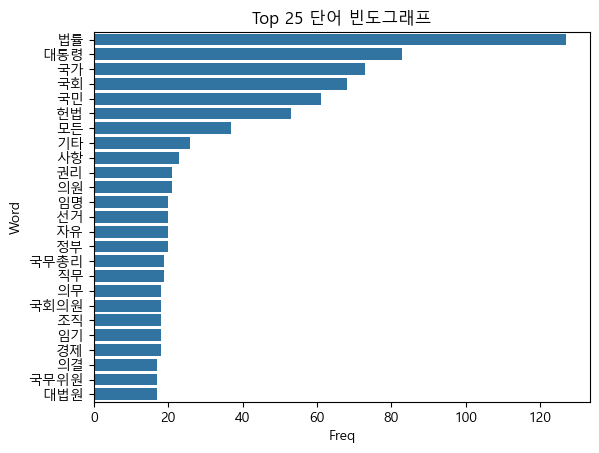

In [52]:
word_Top_count_barplot(sort_cnt_df, max_words=25)

In [ ]:
#동사만 추출해서 상위 20개 동사 빈도 그래프 그리기

#### 워드 클라우드

- 원 문서를 기반으로 한 워드클라우드

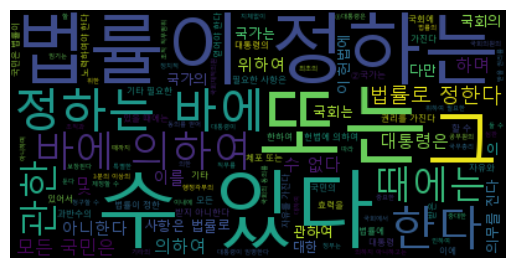

In [55]:
fontpath = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(font_path=fontpath).generate(doc_const)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

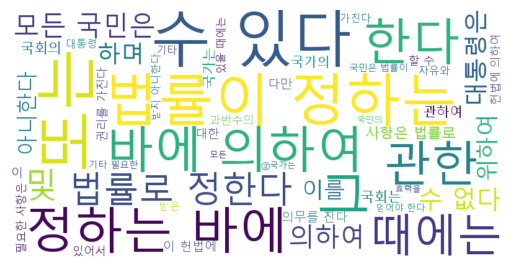

In [56]:
wc2 = WordCloud(font_path=fontpath,
               max_font_size=100,
               width=800,
               height=400,
               background_color='white',
               max_words=50).generate(doc_const)
plt.axis('off')
plt.imshow(wc2, interpolation='bilinear')
plt.show()

- 텍스트 전처리한 데이터 기반의 워드 클라우드

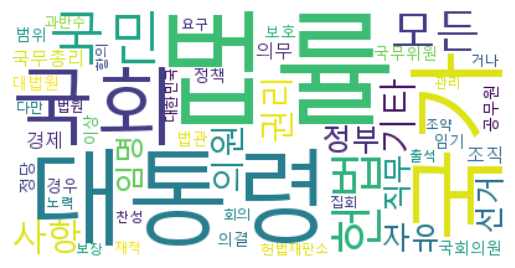

In [62]:
wc3 = WordCloud(font_path=fontpath,
               max_font_size=100,
               background_color='white',
               max_words=50).generate_from_frequencies(const_cnt)
plt.axis('off')
plt.imshow(wc3, interpolation='bilinear')
plt.show()

In [63]:
#품사를 지정하고, 단어수 제한하여 토큰화한 결과를 워드클라우드로 그리기

토큰수: 4019
토큰일부:
['대한민국', '헌법', '유구', '역사', '전통', '빛나는', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '하고', '모든', '사회', '폐습', '불의', '타파', '하며', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '확고히', '하여', '정치', '경제', '사회']


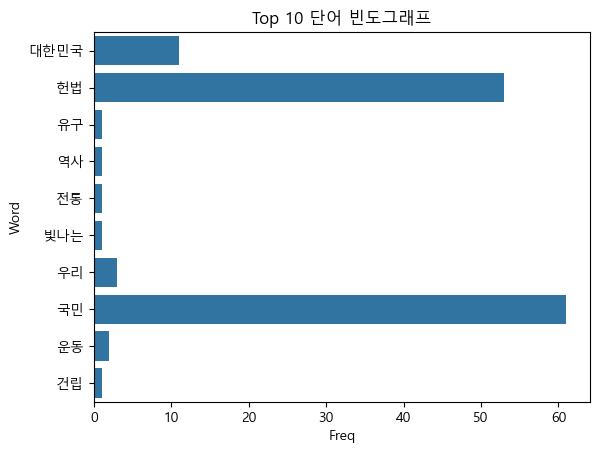

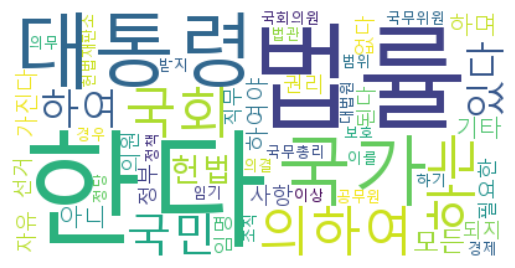

In [70]:
#품사 토큰 정보를 이용하여 원하는 품사와 단어길이를 제한한 토큰들만 활용
def extract_pos_tag_token(tokens_pos, taglist = ['Noun', 'Verb'], word_len=1):
    tokens = [token for token, tag in tokens_pos if tag in taglist]
    tokens = [token for token in tokens if len(token)>=word_len]
    print(f'토큰수: {len(tokens)}')
    print(f'토큰일부:\n{tokens[:50]}')
    return tokens

#토큰들의 빈도를 갖는 데이터프레임 생성
def token_count_df(tokens):
    cnt = Counter(tokens)
    df = pd.DataFrame(pd.Series(cnt), columns=['Freq'])
    df.index.name='Word'
    return df.sort_values(by='Freq', ascending=False)

def draw_wordcloud_cnt(tokens):
    wc = WordCloud(font_path=fontpath,
               max_font_size=100,
               background_color='white',
               max_words=50).generate_from_frequencies(cnt)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

word_len = 2
taglist = ['Noun', 'Adjective', 'Verb']
tokens_pos = Okt().pos(doc_const)
tokens = extract_pos_tag_token(tokens_pos, taglist = taglist, word_len=word_len)
tokens_cnt_df = token_count_df(tokens)
word_Top_count_barplot(df, max_words=10)
draw_wordcloud_cnt(tokens)